# Google Play and Apple iOS App Recommendations

### Scenario:

We're data analysts for an app development company in the United States. Over the last five years we have established a respectably sized customer based, but there are still opportunities to grow our customer base and increase revenue. We want to develop a new app that is a stand-alone free version that our customers will enjoy. To generate revenue, we may employ in-app purchases or a subscription-based model. 

For reference the six most used app monetization strategies (for free apps) are:

* App advertising
* In-app purchases
* Subscriptions
* Selling merchandise
* Sponsorships
* Collecting and selling data
   
To minimize risks and overhead, our validation strategy for an app idea has three steps:

* Build a minimal Android version of the app, and add it to Google Play.
* If the app has a good response from users, we develop it further.
* If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Since we want to develop a new app for Google Play and iOS, the app profiles we pick need to be successful for both markets.

## Method
Before we do any visualization or making and recommendations, we first need to do the following:
* Load in the datasets
* Clean data
* Exploratory Data Analysis

## Recommendations
To make sound business decisions we need to perform a few tasks during analysis:
* Review potential customer base, what are consumers downloading?
* Gauge our competition, what types of apps are our competitors developing?

## Datasets:
We'll be using two sample datasets from Kaggle.com to save time and resources of having to gather millions of records. 

Google Play dataset is comprised of about 10,000 apps.
For this dataset we will be using the terms android, play store, or google interchangeably to reference Google Play Store.

*https://www.kaggle.com/lava18/google-play-store-apps*

Apple iOS contains around 7,000 apps.

For this dataset we will be using the terms apple, iOS, or app store interchangeably to reference Apple iOS App Store.

*https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps*



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use("fivethirtyeight")
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [2]:
google_raw_data = pd.read_csv("googleplaystore.csv")
apple_raw_data = pd.read_csv("AppleStore.csv")

### Data Exploration

In [3]:
google_raw_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10000,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90000,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70000,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50000,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30000,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50000,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00000,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50000,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
google_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


There are minimal entries with missing values. Fortunately, the ones that are missing data may possibly not be as critical to our analysis, such as the current version and android version columns. 

Columns that should be numeric dtype: Rating, Reviews and Price

The values in Installs has a "+" at the end suggesting the information is more "open-ended" than precise, but for our analysis we can remove the "," and "+" and convert to integer, and any app can be treated to have at least the number of installs listed.

In [5]:
missing_ratings = google_raw_data["Rating"].isnull()
google_raw_data[missing_ratings].head(30)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up


In [6]:
missing_type = google_raw_data["Type"].isnull()
google_raw_data[missing_type]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [7]:
missing_content_rating = google_raw_data["Content Rating"].isnull()
google_raw_data[missing_content_rating]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00000,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
# Calculate mean rating by category
google_raw_data.groupby("Category").mean()

,Rating
Category,
1.9,19.00000
ART_AND_DESIGN,4.35806
AUTO_AND_VEHICLES,4.19041
BEAUTY,4.27857
BOOKS_AND_REFERENCE,4.34607
BUSINESS,4.12145
COMICS,4.15517
COMMUNICATION,4.15854
DATING,3.97077


In [9]:
google_raw_data = google_raw_data.dropna(subset=["Type","Content Rating"])

Instead of simply dropping missing data from the ratings column, a more practical solution can be to impute all missing values with the mean of the ratings column. Using the group by method above we noticed that generally each category's mean rating is about 4.2.

### Data Cleaning

In [10]:
# Set copy
google_data = google_raw_data.copy()

In [11]:
# Fills missing rating data with mean rating
google_data["Rating"] = google_data["Rating"].fillna(google_data["Rating"].mean())

# Assign columns Android Version and Current Version to variable
cols = google_data.iloc[:,-2:]

# Drops columns
google_data = google_data.drop(columns=cols)

# Drops any remaining missing data
google_data = google_data.dropna()
print("New length of google_data is: ", len(google_data))

New length of google_data is:  10839


In [12]:
# Verify missing values have been resolved
google_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  object 
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1016.2+ KB


We have dealt with missing data, but this dataset has roughly 1000 rows that are duplicate entries of the same app. In addition, we noticed apps with non-English character usage and text characters that are not in Standard American Code (ASCII)

*https://en.wikipedia.org/wiki/ASCII*

As mentioned in our introduction, we are a US based company, and we only develop applications for English-speaking users. Attempting to analyzing non-English language apps is not in our interest, therefore we'll remove any instances of such apps.

We know that our datasets contain duplicates and foreign-language characters when we previewed the data on kaggle.com.

The google play dataset has more occurrences of duplicated apps, whereas the apple store dataset has less than 10.


In [13]:
# isascii method:
# Check if all the characters in the text are ascii characters
# Maps isascii method to each string in App column utilizing anonymous function
# Filters dataframe for rows only where all characters in App column are standard american code 
# Reassigns back to dataframe variable
google_data = google_data[google_data["App"].map(lambda x: x.isascii())]
print("New length of google_data is: ", len(google_data))


New length of google_data is:  10243


In [14]:
# Cast Reviews to integer
google_data["Reviews"] = google_data["Reviews"].astype(int)

# Strips dollar sign from Price and converts to float
google_data["Price"] = google_data["Price"].str.replace("$","",regex=False)\
                                               .astype(float)

# Strips plus and comma from Installs and converts to integer
google_data["Installs"] = google_data["Installs"].str.replace(",","", regex=False)\
                       .str.replace("+","", regex=False)\
                       .astype(int)

# Converts Last Updated to datetime object
google_data["Last Updated"] = pd.to_datetime(google_data["Last Updated"])

In [15]:
# Checks duplicate apps
google_data[google_data.duplicated(subset="App")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.20000,80805,Varies with device,5000000,Free,0.00000,Everyone,Business,2018-02-26
236,Box,BUSINESS,4.20000,159872,Varies with device,10000000,Free,0.00000,Everyone,Business,2018-07-31
239,Google My Business,BUSINESS,4.40000,70991,Varies with device,5000000,Free,0.00000,Everyone,Business,2018-07-24
256,ZOOM Cloud Meetings,BUSINESS,4.40000,31614,37M,10000000,Free,0.00000,Everyone,Business,2018-07-20
261,join.me - Simple Meetings,BUSINESS,4.00000,6989,Varies with device,1000000,Free,0.00000,Everyone,Business,2018-07-16
...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.00000,1145,1.4M,100000,Free,0.00000,Mature 17+,Dating,2016-02-25
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.40000,36981,4.0M,1000000,Free,0.00000,Everyone,Communication,2018-07-06
10730,FP Notebook,MEDICAL,4.50000,410,60M,50000,Free,0.00000,Everyone,Medical,2018-03-24
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.50000,33599,12M,1000000,Free,0.00000,Everyone,Shopping,2018-07-30


In [16]:
# Sort rows first by total reviews, followed by App name
google_data = google_data.sort_values(by=["Reviews","App"],ascending=False)

In [17]:
google_data.head(30)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
2544,Facebook,SOCIAL,4.10000,78158306,Varies with device,1000000000,Free,0.00000,Teen,Social,2018-08-03
3943,Facebook,SOCIAL,4.10000,78128208,Varies with device,1000000000,Free,0.00000,Teen,Social,2018-08-03
336,WhatsApp Messenger,COMMUNICATION,4.40000,69119316,Varies with device,1000000000,Free,0.00000,Everyone,Communication,2018-08-03
381,WhatsApp Messenger,COMMUNICATION,4.40000,69119316,Varies with device,1000000000,Free,0.00000,Everyone,Communication,2018-08-03
3904,WhatsApp Messenger,COMMUNICATION,4.40000,69109672,Varies with device,1000000000,Free,0.00000,Everyone,Communication,2018-08-03
2604,Instagram,SOCIAL,4.50000,66577446,Varies with device,1000000000,Free,0.00000,Teen,Social,2018-07-31
2545,Instagram,SOCIAL,4.50000,66577313,Varies with device,1000000000,Free,0.00000,Teen,Social,2018-07-31
2611,Instagram,SOCIAL,4.50000,66577313,Varies with device,1000000000,Free,0.00000,Teen,Social,2018-07-31
3909,Instagram,SOCIAL,4.50000,66509917,Varies with device,1000000000,Free,0.00000,Teen,Social,2018-07-31
1879,Clash of Clans,GAME,4.60000,44893888,98M,100000000,Free,0.00000,Everyone 10+,Strategy,2018-07-15


To prepare for removal of duplicated entries we sorted the dataframe first by the total number of reviews and then by the app name.
The logic behind this approach is that some apps have a different number of reviews, and the highest number is probably the most recent or most accurate.

For some reason the last updated column doesn't help identify the most recent app, because we see duplicate apps sharing the same date for last updated. It's not a perfect solution, but this approach will have to be good enough so that we may remove duplicate apps.

In [18]:
# Drops duplicate values using App name as criteria
# Follows our logic of keeping the first occurence based on highest total reviews sorting
google_data = google_data.drop_duplicates(subset="App", keep="first")
print("New length of google_data is: ", len(google_data))

New length of google_data is:  9116


In [19]:
# Verifies the number of unique Apps with the length of the entire dataframe
print(google_data["App"].nunique())
print(google_data.shape)

9116
(9116, 11)


In [20]:
# Fortunately apple's dataset has zero missing values
apple_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [21]:
# Checks duplicate apps
apple_raw_data[apple_raw_data.duplicated(subset="track_name")]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
5603,7579,1089824278,VR Roller Coaster,240964608,USD,0.00000,67,44,3.50000,4.00000,0.81,4+,Games,38,0,1,1
7128,10885,1178454060,Mannequin Challenge,59572224,USD,0.00000,105,58,4.00000,4.50000,1.0.1,4+,Games,38,5,1,1


In [22]:
# Sort rows first by total number of ratings, followed by track name
apple_data = apple_raw_data.sort_values(by=["rating_count_tot","track_name"],ascending=False).copy()

In [23]:
# Drops duplicate values using App name as criteria
# Follows our logic of keeping the first occurence based on most total ratings sorting
apple_data = apple_data.drop_duplicates(subset="track_name", keep="first")
print("New length of apple_data is: ", len(apple_data))

New length of apple_data is:  7195


In [24]:
# isascii method:
# Check if all the characters in the text are ascii characters
# Maps isascii method to each string in track name column utilizing anonymous function
# Filters dataframe for rows only where all characters in track name column are standard american code 
# Reassigns back to dataframe variable
apple_data = apple_data[apple_data["track_name"].map(lambda x: x.isascii())]
print("New length of apple_data is: ", len(apple_data))

New length of apple_data is:  5705


In [25]:
# Comapares correlation of the app size with price, total number of ratings, and the average user rating
apple_data.corr()["size_bytes"][["price","rating_count_tot","user_rating"]]

price              0.15571
rating_count_tot   0.00286
user_rating        0.07920
Name: size_bytes, dtype: float64

The file size of iOS apps have very little correlation with the columns listed above.

In [26]:
apple_data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
16,17,284882215,Facebook,389879808,USD,0.00000,2974676,212,3.50000,3.50000,95,4+,Social Networking,37,1,29,1
519,591,389801252,Instagram,113954816,USD,0.00000,2161558,1289,4.50000,4.00000,10.23,12+,Photo & Video,37,0,29,1
1346,1561,529479190,Clash of Clans,116476928,USD,0.00000,2130805,579,4.50000,4.50000,9.24.12,9+,Games,38,5,18,1
707,810,420009108,Temple Run,65921024,USD,0.00000,1724546,3842,4.50000,4.00000,1.6.2,9+,Games,40,5,1,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00000,1126879,3594,4.00000,4.50000,8.4.1,12+,Music,37,4,1,1


In [27]:
# Drop columns in iOS app store
# We need to keep the rating count total, and user rating columns, 
# Drop the _ver columns as these do not contain the complete picture of the data, only the most recent version's data
cols_to_drop = [
                "Unnamed: 0", 
                "id",
                "size_bytes", # Correlation with other important columns minimal
                "rating_count_ver", # Count of ratings of the most recent version
                "user_rating_ver", # Average user rating of the most recent version
                "sup_devices.num",
                "ipadSc_urls.num",
                "lang.num",
                "vpp_lic"
                ]

apple_data = apple_data.drop(columns=cols_to_drop).set_index("track_name")

In [28]:
# Filters only free apps, and reassigns to new variable, sets copy
ios = apple_data[apple_data["price"] == 0].copy()
print("New length of ios is: ", len(ios))

New length of ios is:  2920


## Free Apps

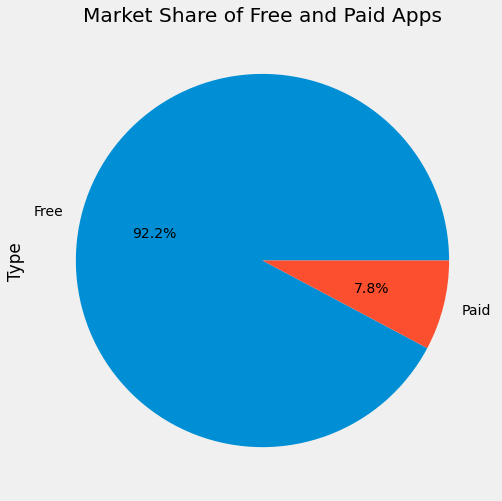

In [29]:
# Constructs groupby object by app type
app_type = google_data.groupby("Type")["Type"].count()
app_type

# Plots results as pie chart
app_type.plot.pie(autopct="%.1f%%",figsize=(12,8))
plt.title("Market Share of Free and Paid Apps");

In the introduction we stated we plan to design a stand-alone free app possibly using a subscription based model or allowing users to upgrade with in-app purchases. Either way, our plan is to develop an app that is free to download, therefore our main concern is analyzing the sample of free apps for patterns or trends.

In [30]:
# Filters only free apps, and reassigns to new variable, sets copy
android = google_data[google_data["Type"] == "Free"].copy()
print("New length of android is: ", len(android))

New length of android is:  8407


In [31]:
print(android.corr())
print("\n")
print(ios.corr())

          Rating  Reviews  Installs  Price
Rating   1.00000  0.06129   0.04349    NaN
Reviews  0.06129  1.00000   0.60552    NaN
Installs 0.04349  0.60552   1.00000    NaN
Price        NaN      NaN       NaN    NaN


                  price  rating_count_tot  user_rating
price               NaN               NaN          NaN
rating_count_tot    NaN           1.00000      0.07587
user_rating         NaN           0.07587      1.00000


There is minimal correlation between columns in the iOS dataframe, but in the android dataset there is a good correlation between the number of installations and number of reviews.

### Review
To summarize we have currently done the following:
* Removed missing data, and imputed where possible
* Corrected any inaccurate formatting and data
* Removed non-English language applications
* Discarded duplicate apps
* Isolated all free apps to a new dataframe


## Categories and Genres
To begin the analysis we may start with determining the most common categories and genres. The Play Store has two columns that describe the function of an app. It seems like Category is the primary, whereas Genre is more of a sub-category. iOS only has one column akin to Play Store Category.

Below we can display all unique values of the Genres column.

In [32]:
android["Genres"].unique()

array(['Social', 'Communication', 'Strategy', 'Tools', 'Arcade',
       'Video Players & Editors', 'Casual', 'Sports', 'News & Magazines',
       'Action', 'Photography', 'Casual;Action & Adventure',
       'Travel & Local', 'Racing', 'Personalization', 'Maps & Navigation',
       'Entertainment', 'Trivia', 'Education;Education', 'Shopping',
       'Productivity', 'Health & Fitness', 'Adventure;Action & Adventure',
       'Simulation', 'Lifestyle', 'Role Playing', 'Books & Reference',
       'Weather', 'Puzzle', 'Word', 'Puzzle;Action & Adventure',
       'Sports;Action & Adventure', 'Board', 'Finance',
       'Puzzle;Brain Games', 'Racing;Action & Adventure', 'Business',
       'Education', 'Adventure', 'Food & Drink',
       'Educational;Pretend Play', 'Comics', 'Card;Action & Adventure',
       'Music', 'Parenting', 'Casino', 'Simulation;Action & Adventure',
       'Role Playing;Action & Adventure', 'Action;Action & Adventure',
       'Dating', 'Arcade;Action & Adventure',
       'E

The genres column has an extensive array of values, and the values describe different categories of apps. The way that these are displayed reminds us of tags that could be used to quickly identify the type of media that it's associated with.

We could modify the data in the Genres column to make it easier to work with later.

In [33]:
# Strips ";" and splits each tag
android["Genres"] = android["Genres"].str.replace("^;", "").str.split(";")

C:\Users\CRYPT-~1\AppData\Local\Temp/ipykernel_19032/2819618066.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  android["Genres"] = android["Genres"].str.replace("^;", "").str.split(";")


In [34]:
# Counts each occurence of a particular genre
genre_count = dict()

for genres in android["Genres"]:
    for genre in genres:
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1

For easier readability we'll transform the dictionary to a dataframe.

In [35]:
# Transforms dictionary to dataframe 
genre_count = pd.DataFrame.from_dict(genre_count, orient="index")
genre_count = genre_count.rename(columns={0: "Count"})
genre_count.head(20).sort_values(by="Count",ascending=False)

,Count
Tools,721
Education,581
Entertainment,536
Sports,282
Personalization,278
Communication,271
Action,269
Photography,253
News & Magazines,235
Social,224


In [36]:
genre_count.index

Index(['Social', 'Communication', 'Strategy', 'Tools', 'Arcade',
       'Video Players & Editors', 'Casual', 'Sports', 'News & Magazines',
       'Action', 'Photography', 'Action & Adventure', 'Travel & Local',
       'Racing', 'Personalization', 'Maps & Navigation', 'Entertainment',
       'Trivia', 'Education', 'Shopping', 'Productivity', 'Health & Fitness',
       'Adventure', 'Simulation', 'Lifestyle', 'Role Playing',
       'Books & Reference', 'Weather', 'Puzzle', 'Word', 'Board', 'Finance',
       'Brain Games', 'Business', 'Food & Drink', 'Educational',
       'Pretend Play', 'Comics', 'Card', 'Music', 'Parenting', 'Casino',
       'Dating', 'Music & Video', 'House & Home', 'Creativity',
       'Libraries & Demo', 'Art & Design', 'Auto & Vehicles', 'Medical',
       'Beauty', 'Events', 'Music & Audio'],
      dtype='object')

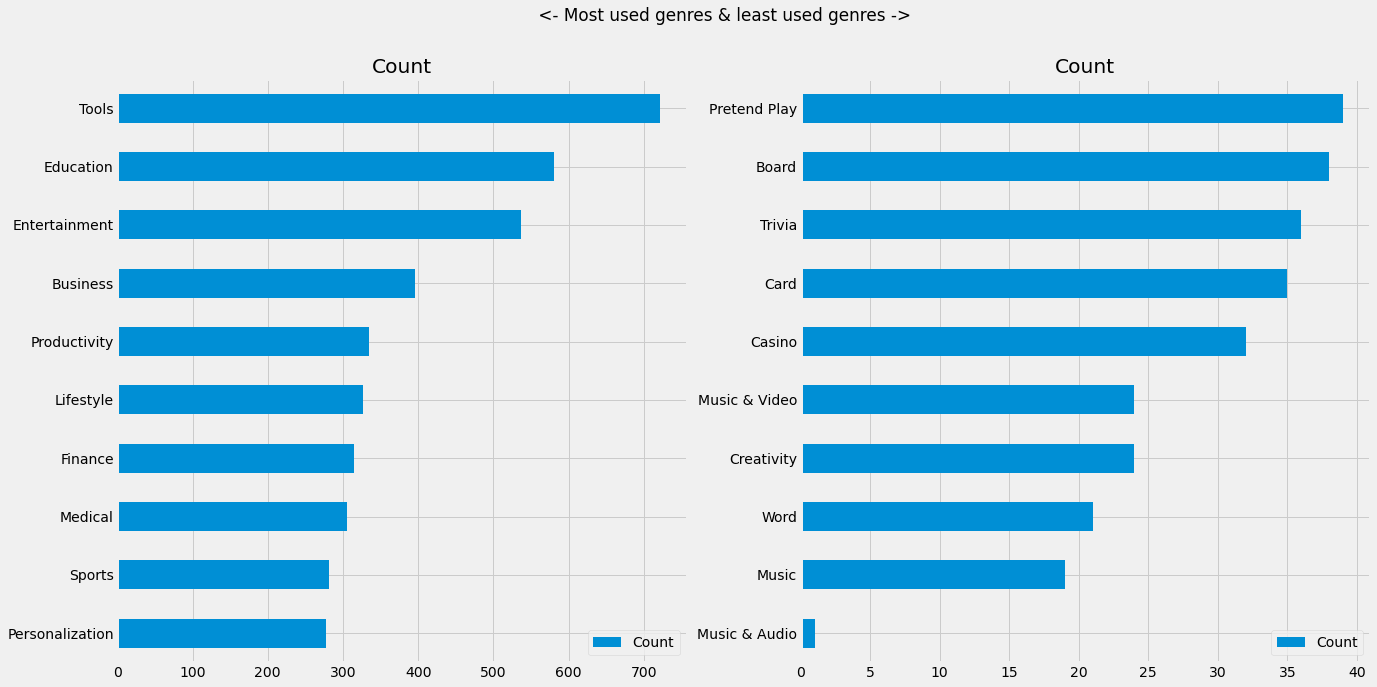

In [37]:
# Sort first 10 values by count 
highest_usage = genre_count.sort_values(by="Count").tail(10)

# Sort last 10 values by count 
lowest_usage = genre_count.sort_values(by="Count").head(10)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((20, 10))
highest_usage.plot(kind="barh", ax=axes[0], subplots=True,title=" <- Most used genres & least used genres ->")

lowest_usage.plot(kind="barh", ax=axes[1], subplots=True);

Top three genres in the android dataset include: Tools, Education, and Entertainment, where as the lowest three are Creativity, Word, and Music.
At first glance, apps that have a more utilitarian approach seem to be more common than apps that are geared towards gaming and entertainment.

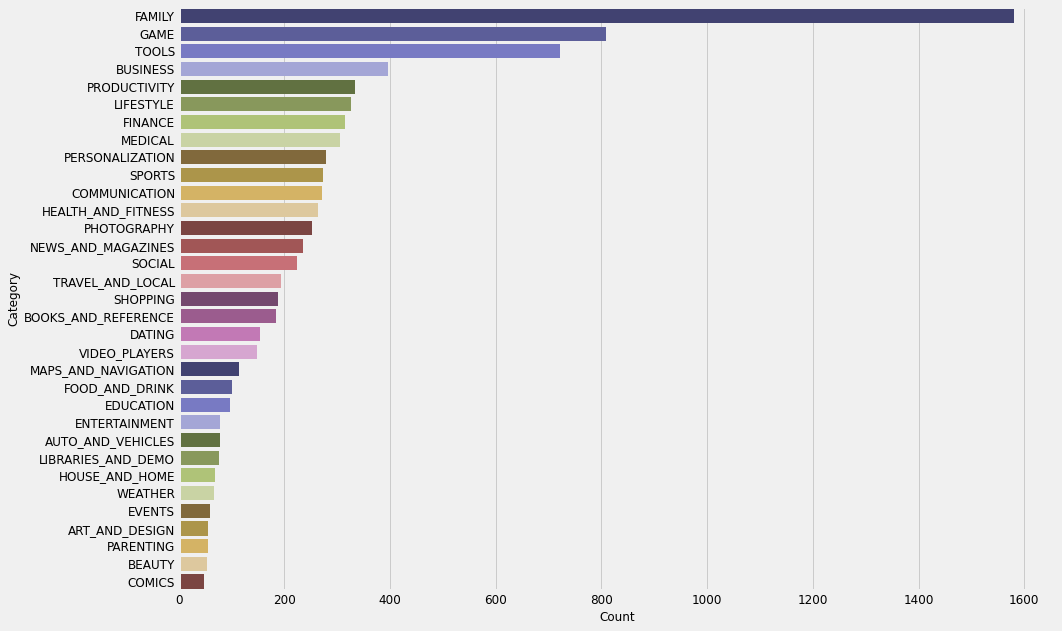

In [38]:
# Plot Google Play most common categories
plt.figure(figsize=(14,10))
sns.countplot(data=android,y="Category",order=android["Category"].value_counts().index, palette="tab20b")
plt.xticks(size=12)
plt.xlabel("Count",size=12)
plt.ylabel("Category",size=12)
plt.yticks(size=12);

The most numerous kinds of apps found on the Play Store include family and game categories, followed by tools and business. Compared to other categories, family is a bit vague on its meaning, but a search concludes that it encompasses family-friendly content for younger audiences, which may include games, books, and other various media geared towards children.

Excluding family and games the google play store library's most common app category includes tools, business, and productivity.

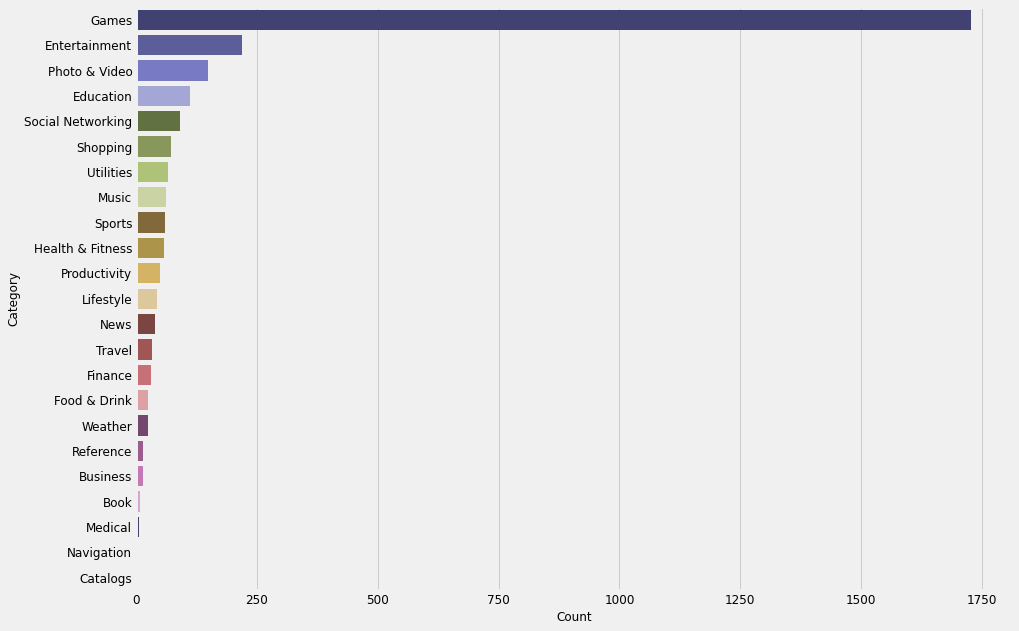

In [39]:
# Plot iOS genre count
plt.figure(figsize=(14,10))
sns.countplot(data=ios,y="prime_genre",order=ios["prime_genre"].value_counts().index, palette="tab20b")
plt.xticks(size=12)
plt.xlabel("Count",size=12)
plt.ylabel("Category",size=12)
plt.yticks(size=12);

There is a stark difference between the google play library and apple's app store library. It's apparent that the App Store gravitates more towards gaming and entertainment, whereas Google’s play store is more utilitarian in nature. Both library's top categories are game-oriented, but the iOS app store appears to have far fewer options for app variety outside of gaming, while the google play store seems more balanced with greater variety.

We may want to avoid recommending a game-oriented app since we already see many apps belonging to that type of category/genre in both libraries. There may be too much competition to effectively differentiate our app from the thousands of games already available.

Fortunately, with apple's store containing mostly games, it may be less difficult to get our app noticed if we recommend something other than gaming.


### The Most Popular Categories and Genres
To discover which categories and genres are the most popular we can use the number of installs column from the android dataset to perform aggregations. This type of data is missing in the iOS dataframe, but an alternative is to use the rating count total instead. This column should be adequate because we'll get a good idea how many users installed an app based on the number of reviews.

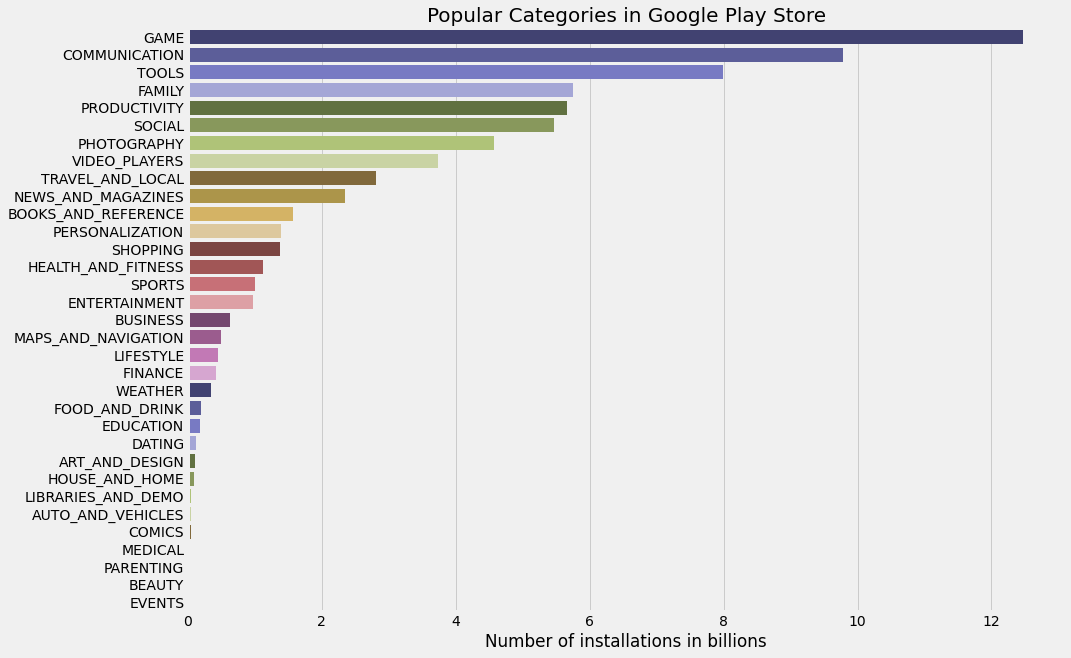

In [40]:
# Constructs groupby object with categories and performs a sum of the number of installs
popular_categories = android.groupby(["Category"])["Installs"].sum().sort_values(ascending = False).reset_index()


popular_categories["Installs"] = popular_categories["Installs"] /1000000000 # Converts number of installs into billions

# Plot popular categories in play store
plt.figure(figsize = (14,10))
ax = sns.barplot(x = "Installs" , y = "Category" , data = popular_categories, palette="tab20b")
ax.set_xlabel("Number of installations in billions")
ax.set_ylabel("")
ax.set_title("Popular Categories in Google Play Store", size = 20);

The most popular categories are game, communication and tools. Gaming is the most popular app category on google play followed by communication. Communication apps are not as prevalent, but have the second highest number of downloads.

In [41]:
# Prints top 10 apps based on the number of app installations
print(android[["App","Category","Installs"]][android["Category"] == "COMMUNICATION"].sort_values(by="Installs",ascending=False).head(10))

print(android[["App","Category","Installs"]][android["Category"] == "TOOLS"].sort_values(by="Installs",ascending=False).head(10))

                                              App       Category    Installs
336                            WhatsApp Messenger  COMMUNICATION  1000000000
391                 Skype - free IM & video calls  COMMUNICATION  1000000000
451                                         Gmail  COMMUNICATION  1000000000
411                  Google Chrome: Fast & Secure  COMMUNICATION  1000000000
464                                      Hangouts  COMMUNICATION  1000000000
403                   LINE: Free Calls & Messages  COMMUNICATION   500000000
371         Google Duo - High Quality Video Calls  COMMUNICATION   500000000
420   UC Browser - Fast Download Private & Secure  COMMUNICATION   500000000
383                 imo free video calls and chat  COMMUNICATION   500000000
4676                              Viber Messenger  COMMUNICATION   500000000
                                                    App Category    Installs
3234                                             Google    TOOLS  1000000000

Communication type apps are dominated by apps like WhatsApp, Skype, Gmail, or Hangouts. While we could recommend a communication app, it would be difficult to compete with these types of apps that already have a large market share.

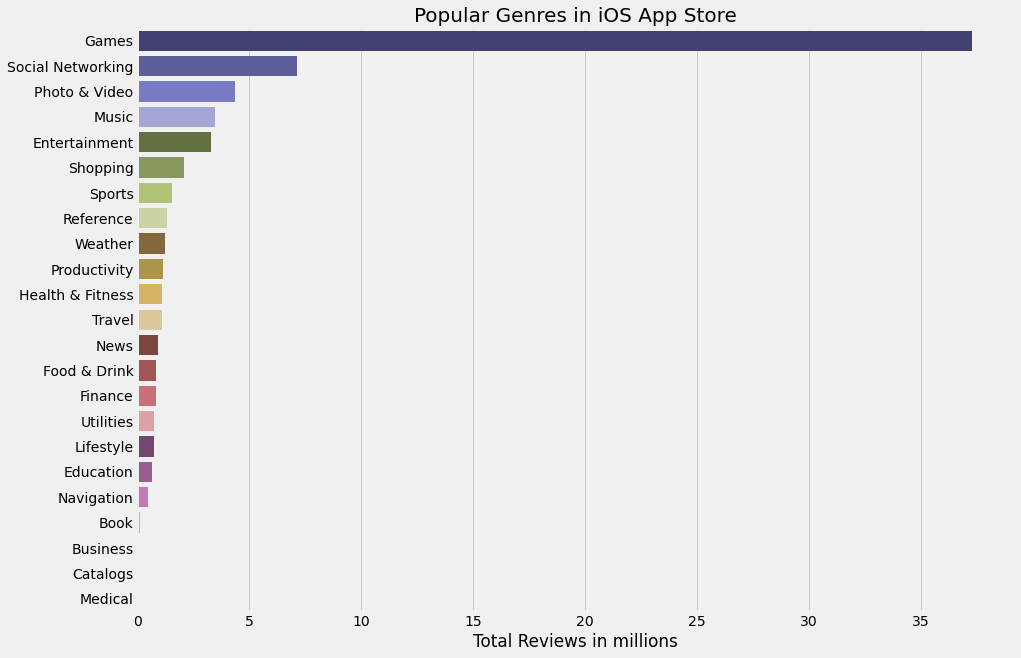

In [42]:
# Constructs groupby object with iOS genres and performs a sum of the total number of ratings
popular_ios_genres = ios.groupby(["prime_genre"])["rating_count_tot"].sum().sort_values(ascending=False).reset_index()

popular_ios_genres["rating_count_tot"] = popular_ios_genres["rating_count_tot"] / 1000000 # Converts number of installs into millions

# Plot popular genres in iOS store
plt.figure(figsize = (14,10))
ax = sns.barplot(x = "rating_count_tot" , y = "prime_genre" , data = popular_ios_genres, palette="tab20b") 
ax.set_xlabel("Total Reviews in millions")
ax.set_ylabel("")
ax.set_title("Popular Genres in iOS App Store", size = 20);

As we have seen so far, gaming apps are the most numerous and most popular by the number of installations. Social netowrking apps and photo/video apps are another popular genre available in the apple iOS library. What social networking or photography apps are available for download?

In [43]:
# Prints highest total number of ratings in iOS for social networking
ios[["prime_genre","rating_count_tot"]][ios["prime_genre"] == "Social Networking"].sort_values(by="rating_count_tot",ascending=False).head(10)

,prime_genre,rating_count_tot
track_name,,
Facebook,Social Networking,2974676
Pinterest,Social Networking,1061624
Skype for iPhone,Social Networking,373519
Messenger,Social Networking,351466
Tumblr,Social Networking,334293
WhatsApp Messenger,Social Networking,287589
Kik,Social Networking,260965
TextNow - Unlimited Text + Calls,Social Networking,164963
Followers - Social Analytics For Instagram,Social Networking,112778


In [44]:
# Prints highest total number of ratings in iOS for photo and video
ios[["prime_genre","rating_count_tot"]][ios["prime_genre"] == "Photo & Video"].sort_values(by="rating_count_tot",ascending=False).head(10)

,prime_genre,rating_count_tot
track_name,,
Instagram,Photo & Video,2161558
Snapchat,Photo & Video,323905
"YouTube - Watch Videos, Music, and Live Streams",Photo & Video,278166
Pic Collage - Picture Editor & Photo Collage Maker,Photo & Video,123433
Funimate video editor: add cool effects to videos,Photo & Video,123268
musical.ly - your video social network,Photo & Video,105429
Photo Collage Maker & Photo Editor - Live Collage,Photo & Video,93781
Vine Camera,Photo & Video,90355
Google Photos - unlimited photo and video storage,Photo & Video,88742


We've discovered that apps belonging to social media or photo and video apps in the iOS library are largely domintated by facebook, whatsapp, pinterest, tumblr, instagram, snapchat, etc...


### Inferences thus far
We may want to avoid recommending the current list of app categories:
* Games/Family (Too numerous)
* Social Media (Dominated by apps such as Facebook or instagram)
* Communication (Dominated by apps such as Gmail, WhatsApp, Skype)

In [45]:
android

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
2544,Facebook,SOCIAL,4.10000,78158306,Varies with device,1000000000,Free,0.00000,Teen,[Social],2018-08-03
336,WhatsApp Messenger,COMMUNICATION,4.40000,69119316,Varies with device,1000000000,Free,0.00000,Everyone,[Communication],2018-08-03
2604,Instagram,SOCIAL,4.50000,66577446,Varies with device,1000000000,Free,0.00000,Teen,[Social],2018-07-31
1879,Clash of Clans,GAME,4.60000,44893888,98M,100000000,Free,0.00000,Everyone 10+,[Strategy],2018-07-15
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70000,42916526,Varies with device,500000000,Free,0.00000,Everyone,[Tools],2018-08-03
...,...,...,...,...,...,...,...,...,...,...,...
6671,4-T's Bar-BQ & Catering,SHOPPING,4.19176,0,243k,10,Free,0.00000,Everyone,[Shopping],2017-01-16
5835,25 Mins Ako ay may lobo Etc Pinoy Kid Song Off...,FAMILY,4.19176,0,42M,10,Free,0.00000,Mature 17+,[Entertainment],2018-07-29
9660,23rd QM BDE EO,BUSINESS,4.19176,0,6.3M,10,Free,0.00000,Everyone,[Business],2017-09-27
7382,1st Fed CI Mobile Banking,FINANCE,4.19176,0,31M,500,Free,0.00000,Everyone,[Finance],2016-09-29


## Google Play Category Reviews
Earlier we noticed that there is a correlation between the number of installations and the total reviews per app. Based on the number of installations, what is the average amount of reviews an app might receive, and what is the average rating? Using a pivot table we can answer that question.

In [46]:
# Constructs pivot table grouped by installs, and aggregates minimum, maximum, and average reviews and ratings
android.pivot_table(["Reviews", "Rating"], "Installs",aggfunc=[np.min,np.max,np.mean], margins=True)

amin            amax              mean               
            Rating Reviews  Rating   Reviews  Rating        Reviews
Installs                                                           
0          4.19176       0 4.19176         0 4.19176        0.00000
1          4.19176       0 5.00000         4 4.21055        0.18605
5          1.50000       0 5.00000         7 4.24646        0.59420
10         1.00000       0 5.00000        20 4.27270        0.96644
50         1.00000       0 5.00000        18 4.28842        2.33735
100        1.00000       0 5.00000        49 4.27368        4.75839
500        1.00000       0 5.00000       124 4.18557        9.61538
1000       1.00000       0 5.00000       594 4.07267       25.45442
5000       1.40000       0 5.00000      1997 4.02540       70.30971
10000      1.70000       0 5.00000      4041 4.00738      239.94077
50000      1.60000       0 4.90000      8369 4.02672      742.48615
100000     1.60000       0 4.90000     28237 4.08365     2549.68923
500000     1.80000     156 4.90000    167974 4.16572     9024.00428
1000000    2.20000       1 4.90000    376223 4.20891    32069.94432
5000000    2.00000    2093 4.90000    896118 4.22714   101392.36071
10000000   3.00000      66 4.90000   3093932 4.29562   343258.85599
50000000   3.10000   14760 4.70000   5591653 4.32742  1204652.64516
100000000  3.50000    9602 4.80000  44893888 4.38212  4018135.24022
500000000  4.00000  282460 4.70000  42916526 4.37500  9852672.41667
1000000000 3.70000  878065 4.50000  78158306 4.22632 18083858.31579
All        1.00000       0 5.00000  78158306 4.16743   229261.07613

Google Apps with less than 100,000 installations generally don't receive as much user feedback as apps with a higher number of installations. It can be inferred that apps with more than 100,000 installations have higher number of total reviews and a higher average rating. In addition, the minimum rating score follows as the number of installations increase, but the maximum rating does not follow the same pattern. 

## Apple Genre Ratings

In [47]:
print(ios.groupby("user_rating").mean())
print("\n")

print("Mean user rating is :", ios["user_rating"].mean())

              price  rating_count_tot
user_rating                          
0.00000     0.00000           0.00000
1.00000     0.00000          12.80000
1.50000     0.00000         334.00000
2.00000     0.00000        6391.75556
2.50000     0.00000       10235.50000
3.00000     0.00000       12342.60221
3.50000     0.00000       29433.88629
4.00000     0.00000       12373.74894
4.50000     0.00000       36154.67115
5.00000     0.00000       23341.34483


Mean user rating is : 3.8825342465753425


Apps with a user rating of 3.5 or higher typically have a higher number of reviews than apps with a lower rating.

In [48]:
# Group by the genre and sort by user rating
ios_genres = ios.groupby("prime_genre",as_index=False)[["user_rating","rating_count_tot"]].mean().sort_values(by="user_rating",ascending=False)
ios_genres

,prime_genre,user_rating,rating_count_tot
2,Catalogs,4.16667,5195.00000
15,Productivity,4.05000,22842.22000
7,Games,4.04951,21585.62015
17,Shopping,3.95890,28877.57534
11,Music,3.94444,55396.01587
8,Health & Fitness,3.87931,19418.62069
12,Navigation,3.87500,125037.25000
1,Business,3.86667,6839.60000
14,Photo & Video,3.86667,29249.76667
16,Reference,3.83333,89562.60000


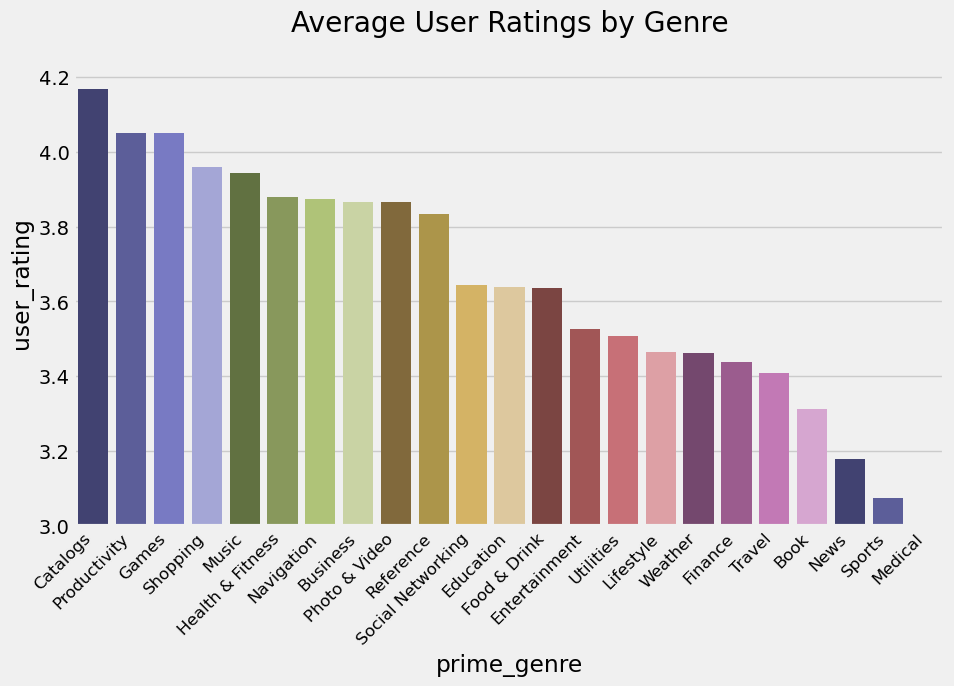

In [49]:
# iOS average user ratings
fig, bar = plt.subplots(figsize = (10,6), dpi = 100)
sns.barplot(data=ios_genres, x="prime_genre", y="user_rating", palette="tab20b")
plt.xticks(rotation=45, ha="right",size=12)
plt.title("Average User Ratings by Genre")
bar.set_ylim(bottom=3, top=4.3);

In contrast to google play, apple store's mean genre rating is lower. Earlier we saw that most google play categories have a typical average rating of 4.2.

### Preliminary App Recommendations
To develop a successful app for both markets we will want to design an app that can attract a large user base that will have a good chance to generate positive user feedback.

In [50]:
# Prints content rating age of both libraries as a percentage
print("Content Rating Age Android:")
print(android["Content Rating"].value_counts() / len(android) * 100)
print("\n")
print("Content Rating Age iOS:")
print(ios["cont_rating"].value_counts() / len(ios) * 100)

Content Rating Age Android:
Everyone          81.55109
Teen              11.03842
Mature 17+         4.17509
Everyone 10+       3.17592
Adults only 18+    0.03568
Unrated            0.02379
Name: Content Rating, dtype: float64


Content Rating Age iOS:
4+    66.43836
12+   16.95205
9+    10.68493
17+    5.92466
Name: cont_rating, dtype: float64


The primary target audience for both libraries is inclusive to most age groups. 81 % of google's library is rated Everyone, and 66 % of apple's library is rated for users at the minimum of 4 years old.

In [51]:
# Filters android apps into new dataframe with more than 100,000 installations and a rating of 4 or higher
filter_a = (android["Installs"] > 100000) & (android["Rating"] >= 4)

# Filters ios apps into new dataframe with more than 20,000 installations and a rating of 3.5 or higher
filter_i = (ios["rating_count_tot"] >= 20000) & (ios["user_rating"] >= 3.5)

profitable_apps = android[filter_a]
profitable_apps_ios = ios[filter_i]

In [57]:
profitable_apps.sort_values(by="Installs",ascending=False).head(30)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
2544,Facebook,SOCIAL,4.10000,78158306,Varies with device,1000000000,Free,0.00000,Teen,[Social],2018-08-03
411,Google Chrome: Fast & Secure,COMMUNICATION,4.30000,9643041,Varies with device,1000000000,Free,0.00000,Everyone,[Communication],2018-08-01
464,Hangouts,COMMUNICATION,4.00000,3419513,Varies with device,1000000000,Free,0.00000,Everyone,[Communication],2018-07-21
391,Skype - free IM & video calls,COMMUNICATION,4.10000,10484169,Varies with device,1000000000,Free,0.00000,Everyone,[Communication],2018-08-03
3523,Google Drive,PRODUCTIVITY,4.40000,2731211,Varies with device,1000000000,Free,0.00000,Everyone,[Productivity],2018-08-06
3234,Google,TOOLS,4.40000,8033493,Varies with device,1000000000,Free,0.00000,Everyone,[Tools],2018-08-03
2884,Google Photos,PHOTOGRAPHY,4.50000,10859051,Varies with device,1000000000,Free,0.00000,Everyone,[Photography],2018-08-06
5856,Google Play Games,FAMILY,4.30000,7168735,Varies with device,1000000000,Free,0.00000,Teen,[Entertainment],2018-07-16
336,WhatsApp Messenger,COMMUNICATION,4.40000,69119316,Varies with device,1000000000,Free,0.00000,Everyone,[Communication],2018-08-03
3232,Google Street View,TRAVEL_AND_LOCAL,4.20000,2129707,Varies with device,1000000000,Free,0.00000,Everyone,[Travel & Local],2018-08-06


In [58]:
profitable_apps_ios.sort_values(by="rating_count_tot",ascending=False).head(30)

,currency,price,rating_count_tot,user_rating,ver,cont_rating,prime_genre
track_name,,,,,,,
Facebook,USD,0.00000,2974676,3.50000,95,4+,Social Networking
Instagram,USD,0.00000,2161558,4.50000,10.23,12+,Photo & Video
Clash of Clans,USD,0.00000,2130805,4.50000,9.24.12,9+,Games
Temple Run,USD,0.00000,1724546,4.50000,1.6.2,9+,Games
Pandora - Music & Radio,USD,0.00000,1126879,4.00000,8.4.1,12+,Music
Pinterest,USD,0.00000,1061624,4.50000,6.26,12+,Social Networking
Bible,USD,0.00000,985920,4.50000,7.5.1,4+,Reference
Candy Crush Saga,USD,0.00000,961794,4.50000,1.101.0,4+,Games
Spotify Music,USD,0.00000,878563,4.50000,8.4.3,12+,Music


<AxesSubplot:>

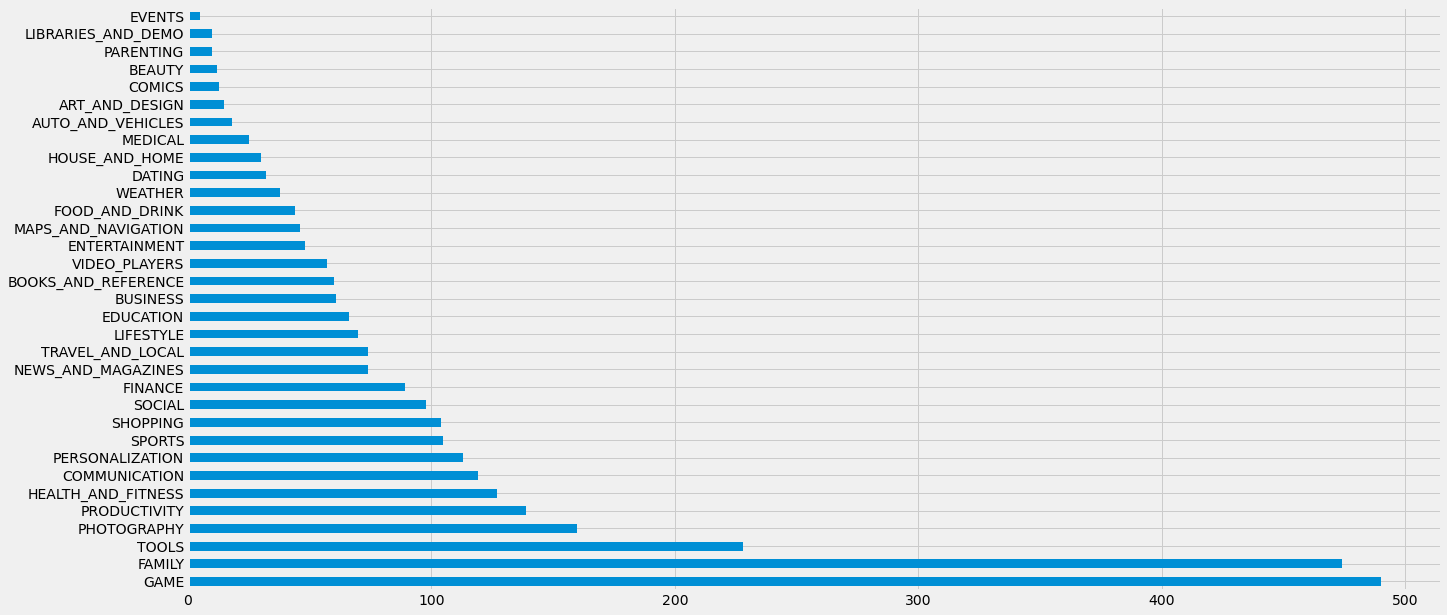

In [53]:
# Plots categories by count
profitable_apps["Category"].value_counts().plot(kind="barh",figsize=(20,10))

<AxesSubplot:>

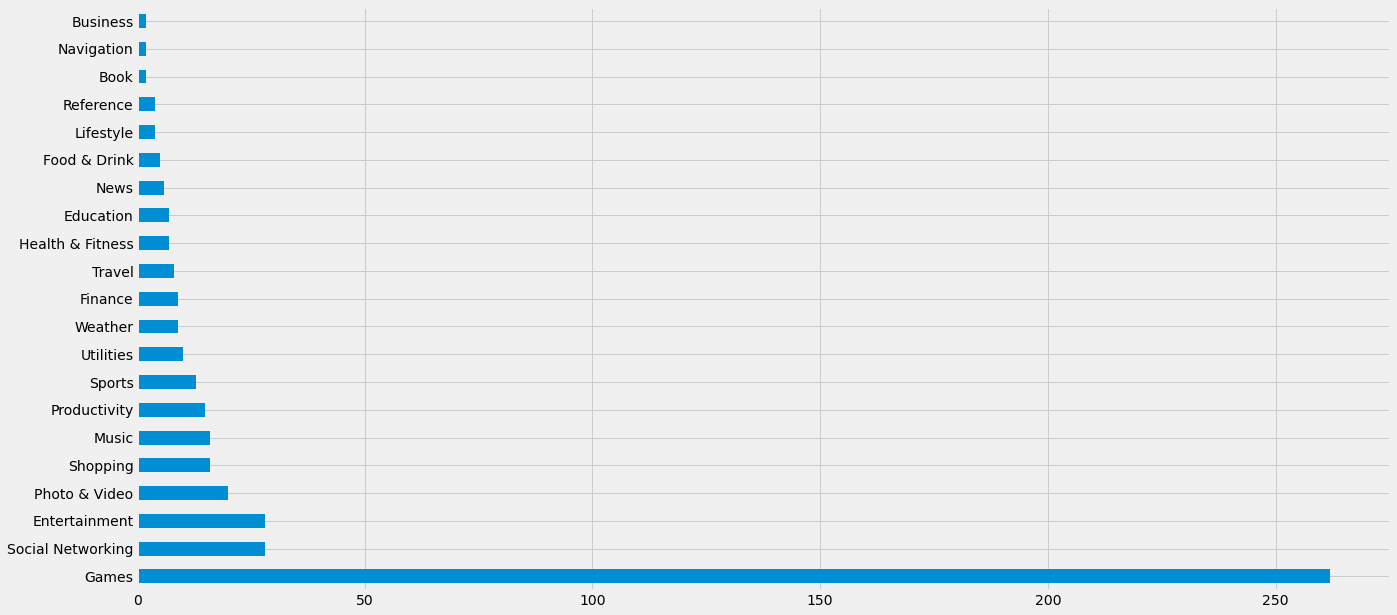

In [54]:
# Plots iOS genres by count
profitable_apps_ios["prime_genre"].value_counts().plot(kind="barh",figsize=(20,10))

After applying filtering criteria for apps with above average ratings and high number of installations the libraries still follow similar patterns from before. Gaming is the most popular with utilitarian apps following in second in the android library. Social Networking and Entertainment are other popular options in apple's library.


In [55]:
# Displays entertainment apps
profitable_apps_ios[profitable_apps_ios["prime_genre"] == "Entertainment"].sort_values(by="rating_count_tot",ascending=False).head(15)

,currency,price,rating_count_tot,user_rating,ver,cont_rating,prime_genre
track_name,,,,,,,
Netflix,USD,0.00000,308844,3.50000,9.21.3,4+,Entertainment
Fandango Movies - Times + Tickets,USD,0.00000,291787,4.00000,8.6,4+,Entertainment
Colorfy: Coloring Book for Adults,USD,0.00000,247809,4.50000,3.7.1,4+,Entertainment
IMDb Movies & TV - Trailers and Showtimes,USD,0.00000,183425,4.50000,7.11,12+,Entertainment
Twitch,USD,0.00000,109549,4.50000,3.20.2,12+,Entertainment
Action Movie FX,USD,0.00000,101222,4.50000,3.2.12,9+,Entertainment
iFunny :),USD,0.00000,98344,3.50000,4.6.8,17+,Entertainment
The CW,USD,0.00000,97368,4.50000,v2.13.9,12+,Entertainment
The Moron Test,USD,0.00000,88613,4.00000,6.3.1,4+,Entertainment


In [56]:
# Displays entertainment apps
profitable_apps[profitable_apps["Category"] == "ENTERTAINMENT"].sort_values(by="Installs",ascending=False).head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
958,Netflix,ENTERTAINMENT,4.40000,5456708,Varies with device,100000000,Free,0.00000,Teen,[Entertainment],2018-07-31
893,Talking Ben the Dog,ENTERTAINMENT,4.30000,1633682,57M,100000000,Free,0.00000,Everyone,[Entertainment],2018-07-03
866,Hotstar,ENTERTAINMENT,4.30000,4885646,Varies with device,100000000,Free,0.00000,Teen,[Entertainment],2018-08-03
888,IMDb Movies & TV,ENTERTAINMENT,4.20000,501498,12M,100000000,Free,0.00000,Teen,[Entertainment],2018-07-26
889,Twitch: Livestream Multiplayer Games & Esports,ENTERTAINMENT,4.60000,2133296,Varies with device,50000000,Free,0.00000,Teen,[Entertainment],2018-07-31
879,Talking Ginger 2,ENTERTAINMENT,4.20000,702975,49M,50000000,Free,0.00000,Everyone,[Entertainment],2018-07-05
892,PlayStation App,ENTERTAINMENT,4.20000,613059,25M,50000000,Free,0.00000,Everyone,[Entertainment],2018-07-26
886,Amazon Prime Video,ENTERTAINMENT,4.20000,411683,24M,50000000,Free,0.00000,Teen,[Entertainment],2018-08-02
1002,SketchBook - draw and paint,ENTERTAINMENT,4.30000,256664,77M,10000000,Free,0.00000,Everyone,[Entertainment],2018-05-04
973,Redbox,ENTERTAINMENT,4.10000,115033,30M,10000000,Free,0.00000,Everyone,[Entertainment],2018-07-02


Most of the entertainment apps are movie/TV streaming services.

In [60]:
profitable_apps_ios[profitable_apps_ios["prime_genre"] == "Photo & Video"].sort_values(by="rating_count_tot",ascending=False).head(15)

,currency,price,rating_count_tot,user_rating,ver,cont_rating,prime_genre
track_name,,,,,,,
Instagram,USD,0.00000,2161558,4.50000,10.23,12+,Photo & Video
Pic Collage - Picture Editor & Photo Collage Maker,USD,0.00000,123433,5.00000,7.12.17,12+,Photo & Video
Funimate video editor: add cool effects to videos,USD,0.00000,123268,4.50000,6.5.7,12+,Photo & Video
musical.ly - your video social network,USD,0.00000,105429,4.50000,5.7.3,12+,Photo & Video
Photo Collage Maker & Photo Editor - Live Collage,USD,0.00000,93781,4.50000,5.5.0,4+,Photo & Video
Vine Camera,USD,0.00000,90355,3.50000,6.0.2,4+,Photo & Video
Google Photos - unlimited photo and video storage,USD,0.00000,88742,5.00000,2.17.0,4+,Photo & Video
Flipagram,USD,0.00000,79905,4.50000,8.19.2,12+,Photo & Video
Mixgram - Picture Collage Maker - Pic Photo Editor,USD,0.00000,54282,4.50000,4.2.2,4+,Photo & Video


In [59]:
profitable_apps[profitable_apps["Category"] == "PHOTOGRAPHY"].sort_values(by="Installs",ascending=False).head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
2884,Google Photos,PHOTOGRAPHY,4.50000,10859051,Varies with device,1000000000,Free,0.00000,Everyone,[Photography],2018-08-06
2921,Photo Editor Pro,PHOTOGRAPHY,4.30000,1871421,Varies with device,100000000,Free,0.00000,Everyone,[Photography],2017-12-21
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,PHOTOGRAPHY,4.50000,7594559,34M,100000000,Free,0.00000,Teen,[Photography],2018-08-06
5057,AR effect,PHOTOGRAPHY,4.20000,79792,Varies with device,100000000,Free,0.00000,Everyone,[Photography],2018-08-03
2939,Photo Collage Editor,PHOTOGRAPHY,4.20000,1028637,Varies with device,100000000,Free,0.00000,Everyone,[Photography],2017-12-21
2942,"Z Camera - Photo Editor, Beauty Selfie, Collage",PHOTOGRAPHY,4.40000,1075277,47M,100000000,Free,0.00000,Mature 17+,[Photography],2018-08-03
2847,"Sweet Selfie - selfie camera, beauty cam, phot...",PHOTOGRAPHY,4.60000,1159058,25M,100000000,Free,0.00000,Everyone,[Photography],2018-08-03
8307,LINE Camera - Photo editor,PHOTOGRAPHY,4.30000,1517395,Varies with device,100000000,Free,0.00000,Everyone,[Photography],2018-03-06
10707,Photo Editor Collage Maker Pro,PHOTOGRAPHY,4.50000,1519671,Varies with device,100000000,Free,0.00000,Everyone,[Photography],2018-02-01
2945,YouCam Perfect - Selfie Photo Editor,PHOTOGRAPHY,4.50000,1579343,Varies with device,100000000,Free,0.00000,Everyone,[Photography],2018-07-25


Photography/Video apps are designed to either store pictures or videos, or to edit and enhance the quality of pictures.

In [70]:
profitable_apps_ios[profitable_apps_ios["prime_genre"] == "Utilities"].sort_values(by="rating_count_tot",ascending=False).head(20)

,currency,price,rating_count_tot,user_rating,ver,cont_rating,prime_genre
track_name,,,,,,,
My Verizon,USD,0.00000,126948,4.50000,5.10.0,4+,Utilities
The Calculator - Free and Easy Calculating!,USD,0.00000,99244,4.50000,4.7.2,4+,Utilities
Speedtest by Ookla,USD,0.00000,65016,3.50000,3.8.2,4+,Utilities
Alarm Clock HD Free - Digital Alarm Clock Display,USD,0.00000,54496,4.50000,3.0.5,4+,Utilities
Calculator Pro for iPad Free - Smart Calculator,USD,0.00000,47803,4.50000,4.9,4+,Utilities
Bitmoji - Your Personal Emoji,USD,0.00000,37972,4.50000,10.6.1,12+,Utilities
Truecaller - Spam Identification & Block,USD,0.00000,27791,4.50000,7.5,4+,Utilities
Browser and File Manager for Documents,USD,0.00000,27750,5.00000,2.0.1,17+,Utilities
"Flashlight for iPhone , iPod and iPad",USD,0.00000,26697,4.50000,4.1.1,4+,Utilities


In [67]:
profitable_apps[profitable_apps["Category"] == "TOOLS"].sort_values(by="Installs",ascending=False).head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
3234,Google,TOOLS,4.40000,8033493,Varies with device,1000000000,Free,0.00000,Everyone,[Tools],2018-08-03
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70000,42916526,Varies with device,500000000,Free,0.00000,Everyone,[Tools],2018-08-03
3265,Gboard - the Google Keyboard,TOOLS,4.20000,1859115,Varies with device,500000000,Free,0.00000,Everyone,[Tools],2018-07-31
3235,Google Translate,TOOLS,4.40000,5745093,Varies with device,500000000,Free,0.00000,Everyone,[Tools],2018-08-04
3255,SHAREit - Transfer & Share,TOOLS,4.60000,7790693,17M,500000000,Free,0.00000,Everyone,[Tools],2018-07-30
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70000,24900999,Varies with device,500000000,Free,0.00000,Everyone,[Tools],2018-08-04
7550,Battery Doctor-Battery Life Saver & Battery Co...,TOOLS,4.50000,8190074,17M,100000000,Free,0.00000,Everyone,[Tools],2018-06-01
4568,"360 Security - Free Antivirus, Booster, Cleaner",TOOLS,4.60000,16771865,Varies with device,100000000,Free,0.00000,Everyone,[Tools],2018-08-04
3243,Device Help,TOOLS,4.20000,28860,Varies with device,100000000,Free,0.00000,Everyone,[Tools],2018-07-18
4151,Google Now Launcher,TOOLS,4.20000,857215,7.9M,100000000,Free,0.00000,Everyone,[Tools],2017-12-07


## App Recommendations:

Analyzing the google and apple libraries uncovered a few consumer trends. Users love to download and use gaming and social networking apps, however we decided to avoid developing any new apps belonging to those categories, because these markets are already saturated with gaming and social networking, or dominated by a handful of apps like facebook, whatsapp, google, or instagram.

We also noticed that our competition is developing a greater variety of apps for google play than the apple store. Many companies are developing games, social networking, and entertainment apps for both libraries and it may be difficult to compete against companies like facebook, google, netflix or amazon that already have a firm hold over the app market place.

With these two questions answered we narrowed down our recommendations to three categories that we believe will be successful for both libraries:

* Entertainment: a drawing, sketching, or graphic design app (advanced/additional features to purchase) 
* Photo/Video: ultilize our own cloud service for media storage (subscription based), or a photo/video editor (advanced/additional features to purchase)
* Tools/Utilities: we could design our own VPN/antivirus protection app with a monthly/yearly subscription

A full, comprehensive analysis may take months and may require more data, but this is a good preliminary analysis.

### Next Steps:

We could utilize more data, perhaps a dataset with more descriptive user reviews of each app. If both datasets had a column with the associated Developer for each app we could possibly gain a better understanding of our competition. Another possible option would be to inspect the Last Updated column on Google Play. This column may give us insights to see the frequency of apps are updated. If an app is up-to-date it probably has an active user base.

Analyzing the premium apps could give us insights on how to price the premium versions of our app, or perhaps there may even be different trends compared to free apps.